<font size="+3"><strong>2.1. Predicting Price with Size</strong></font>

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted


**Task 2.1.1:** Write a function named `wrangle` that takes a file path as an argument and returns a DataFrame.

In [3]:
def wrangle(filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # Subset to properties in "Capital Federal"
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # Subset to "apartments"
    mask_apt = df['property_type'] == 'apartment'
    
    # Subset to properties where 'price_aprox_usd' < 400000
    mask_price = df['price_aprox_usd'] < 400000
    
    # Subset
    df = df[mask_ba & mask_apt & mask_price]
    
    # Remove outliers by 'surface_covered_in_m2'
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    
    df = df[mask_area]
    
    return df

**Task 2.1.2:** Use your `wrangle` function to create a DataFrame `df` from the CSV file `data/raw/buenos-aires-real-estate-1.csv`.

In [7]:
df = wrangle("../data/raw/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...


**Task 2.1.3:** Add to your `wrangle` function so that the DataFrame it returns only includes apartments in Buenos Aires (`"Capital Federal"`) that cost less than $400,000 USD. Then recreate `df` from `data/buenos-aires-real-estate-1.csv` by re-running the cells above. 

**Task 2.1.4:** Create a histogram of `"surface_covered_in_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Apartment Sizes"`.

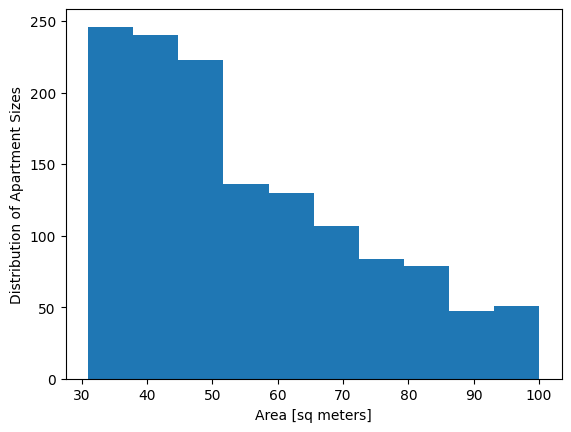

In [8]:
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Distribution of Apartment Sizes');

**Task 2.1.5:** Calculate the summary statistics for `df` using the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method. 

In [9]:
df['surface_covered_in_m2'].describe()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

**Task 2.1.6:** Add to your wrangle function so that it removes observations that are outliers in the `"surface_covered_in_m2"` column. Specifically, all observations should fall between the `0.1` and `0.9` quantiles for `"surface_covered_in_m2"`.

**Task 2.1.7:** Create a scatter plot that shows price (`"price_aprox_usd"`) vs area (`"surface_covered_in_m2"`) in our dataset. Make sure to label your x-axis `"Area [sq meters]"` and your y-axis `"Price [USD]"`.

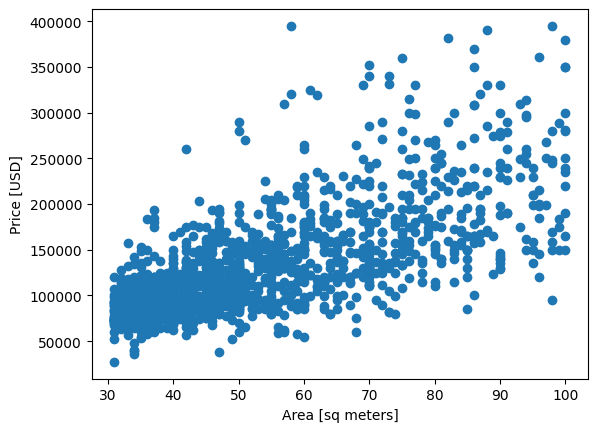

In [10]:
plt.scatter(x = df['surface_covered_in_m2'], y=df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]');

**Task 2.1.8:** Create the feature matrix named `X_train`, which you'll use to train your model. It should contain one feature only: `["surface_covered_in_m2"]`. Remember that your feature matrix should always be two-dimensional. 


In [11]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)